# Water Quality 
Name: Goh Pin Pin Isaac<br>
Admin Number: P2317623<br>
Class: DAAA/FT/1B/07<br>
<br>

# Project Objective
<hr>
Create a *supervised classification* model to predict if water is safe drinkable (Potable) or not

# Background
<hr>

**Safe and readily available water** is important for public health, whether it is used for drinking, domestic use, food production or recreational purposes. Improved water supply and sanitation, and better management of water resources, can boost countries’ economic growth and can contribute greatly to poverty reduction.
<br><br>

Contaminated water and poor sanitation are linked to transmission of diseases such as **cholera, diarrhoea, dysentery, hepatitis A, typhoid, and polio.** Absent, inadequate, or inappropriately managed water and sanitation services expose individuals to preventable health risks. This is particularly the case in health care facilities where both patients and staff are placed at additional risk of infection and disease when water, sanitation, and hygiene services are lacking. Globally, **15%** of patients develop an infection during a hospital stay, with the proportion much greater in low-income countries.
<br><br>

This is a dataset collected from an **environmental company**. 
The dataset containsvarious information on water from different sources. 
From the perspective of quality control, the company wants to build a machine learning model to predict water quality based on the water properties.
<hr>
<br><br><br>

### Classification model performance:
- Accuracy
- Confusion matrix
- Precision, recall, F1-score
- ROC AUC

### STEPS for Classification
1. Getting Data ready (import file)
2. Get target(*y*) & features(*X*) 
3. Split data (*Train* | *Test*)
4. Imputing   
5. Choose the right estimator/algorithm
6. Fit the model/algorithm (*Train*)
7. Evaluate Model
8. Improve Model
9. Compare (*run test data according to y_test*)
10. Save Model

In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import seaborn as sns

# Plotting
import matplotlib.pyplot as plt
import plotly.express as px

# Dataset Processing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


# Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split


# Model Evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import (balanced_accuracy_score, recall_score, f1_score, roc_auc_score, accuracy_score)
from sklearn import tree

In [2]:
# Importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
# Set the SEED for random (Same Random results when re-ran)
random_state = 17

# 1. Importing CSV

In [4]:
dataset = pd.read_csv('./CA1-Dataset/CA1-Classification-Dataset.csv', sep=',')
dataset.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes   Clarity  Quality  
0       10.379783        86.990970  2.963135        0  
1       15.180013        56.329076  4.500656        0  
2       16.868637        66.420093  3.055934        0  
3       18.436525       100.341674  4.628771        0  
4       11.558279        31.997993  4.075075        0

# Exploratory Data Analysis
This is a dataset collected from an environmental company, it contains 3276 records with 10 fields(floats).

- **ph:**               The range goes from 0 - 14
- **Hardness:**         Total amount of Metal in sample *Milligrams per Liter (mg/L)*
- **Solids:**           Total amount of Solids in sample *Micrograms per Liter (ppm)*
- **Chloramines:**      Total amount of Chloramines in sample *Milligrams per Liter (ppm)*
- **Sulfate:**          Total amount of Sulfate in sample *Micrograms per Liter (mg/L)*
- **Conductivity:**     Conductivity of water *Micromhos per centimeter (µmhos/cm)*
- **Organic_carbon:**   Total amount of Carbon in organic compounds in sample *Micrograms per Liter (ppm)*
- **Trihalomethanes:**  Total amount of Trihalomethanes in sample *Micrograms per Liter (µg/L)*
- **Clarity:**          Distance in decimeter(dm) from water surface to depth where sunlight can no longer penetrate the water
- **Quality:**          Label to indicate Clean(1) or Unclean(0) **(TARGET)**

## Functions used
- df.shape
- df.info()
- df.describe()
- df.unique()

### Data Exploration

In [5]:
dataset.shape

(3276, 10)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Clarity          3276 non-null   float64
 9   Quality          3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#### Dataset Statistics

In [7]:
dataset.describe().style.background_gradient(cmap="Blues")

# Target Variable
Model will have to classify into 2
- Quality (0) - Not safe to drink
- Quality (1) - Safe to drink

In [8]:
dataset["Quality"].unique()

array([0, 1], dtype=int64)

### This shows the percentage of (0,1) that are in Quality 
Since its not evenly distributed **(inbalanced dataset)**, we need to balance it.<br>
It makes training a model easier because it helps prevent the model from becoming biased towards one class.<br>
However, we need to **downgrade** to **scikit-learn 1.2.2** in order to use the libraries

### Ways to handle inbalanced datasets
- Random Oversampling
    - `not majority` = resample all classes but the majority class
    - predicts feature values for lower classes to reach the highest class. 
    - SMOTE & ADASYN which uses KNearestNeighbours Algorithm to predict value
- Random Undersampling
    - `not minority` = resample all classes but the minority class
    - drops data to the lowest class (**wasteful**)

<Axes: ylabel='count'>

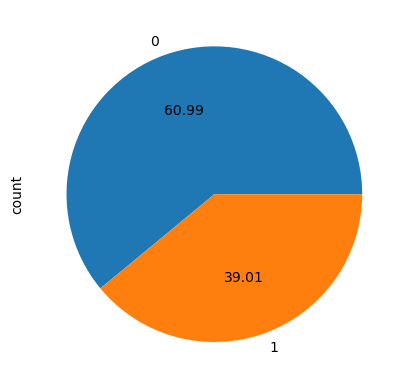

In [9]:
dataset["Quality"].value_counts().plot.pie(autopct="%.2f")

<Axes: xlabel='Quality', ylabel='count'>

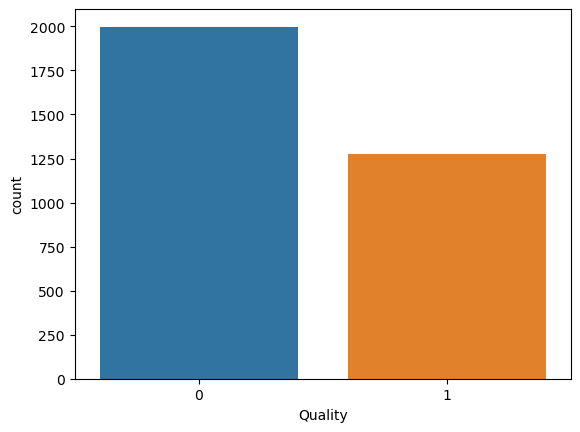

In [10]:
sns.countplot(x="Quality",data=dataset)

We notice that there are some null values in the features. Hence we need to Impute them (Replace them with smart guess)

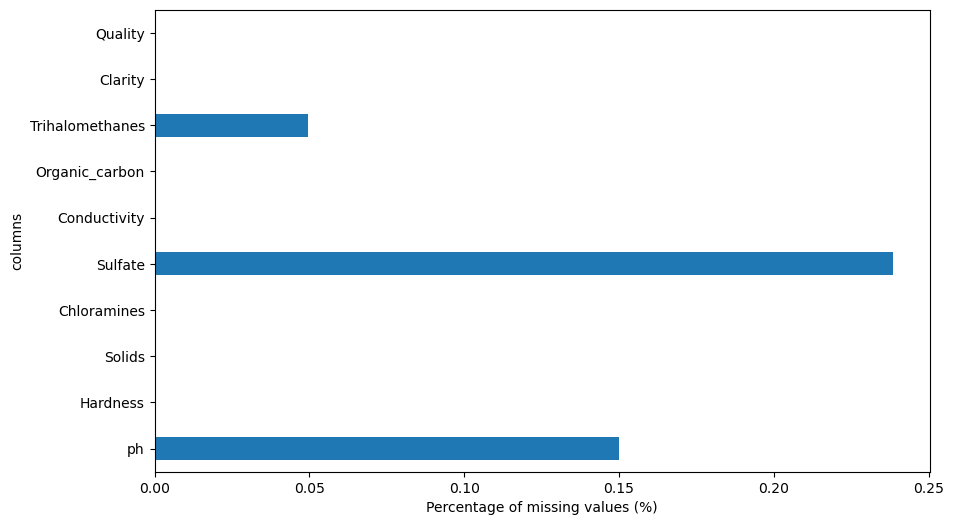

In [11]:
dataset.isna().mean().plot.barh(figsize=(10,6))
plt.ylabel("columns")
plt.xlabel("Percentage of missing values (%)")
plt.show()

In [12]:
def preprocess_inputs(df):
    df = df.copy()

    df["ph"] = df["ph"].fillna(df["ph"].mean())
    df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate" ].mean())
    df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

    return df

This is our new dataset with the null values replaced with its mean

In [13]:
dataset_eda = preprocess_inputs(dataset)
dataset_eda.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes   Clarity  Quality  
0       10.379783        86.990970  2.963135        0  
1       15.180013        56.329076  4.500656        0  
2       16.868637        66.420093  3.055934        0  
3       18.436525       100.341674  4.628771        0  
4       11.558279        31.997993  4.075075        0

# Univariate Analysis
explores each variable in a data set, separately

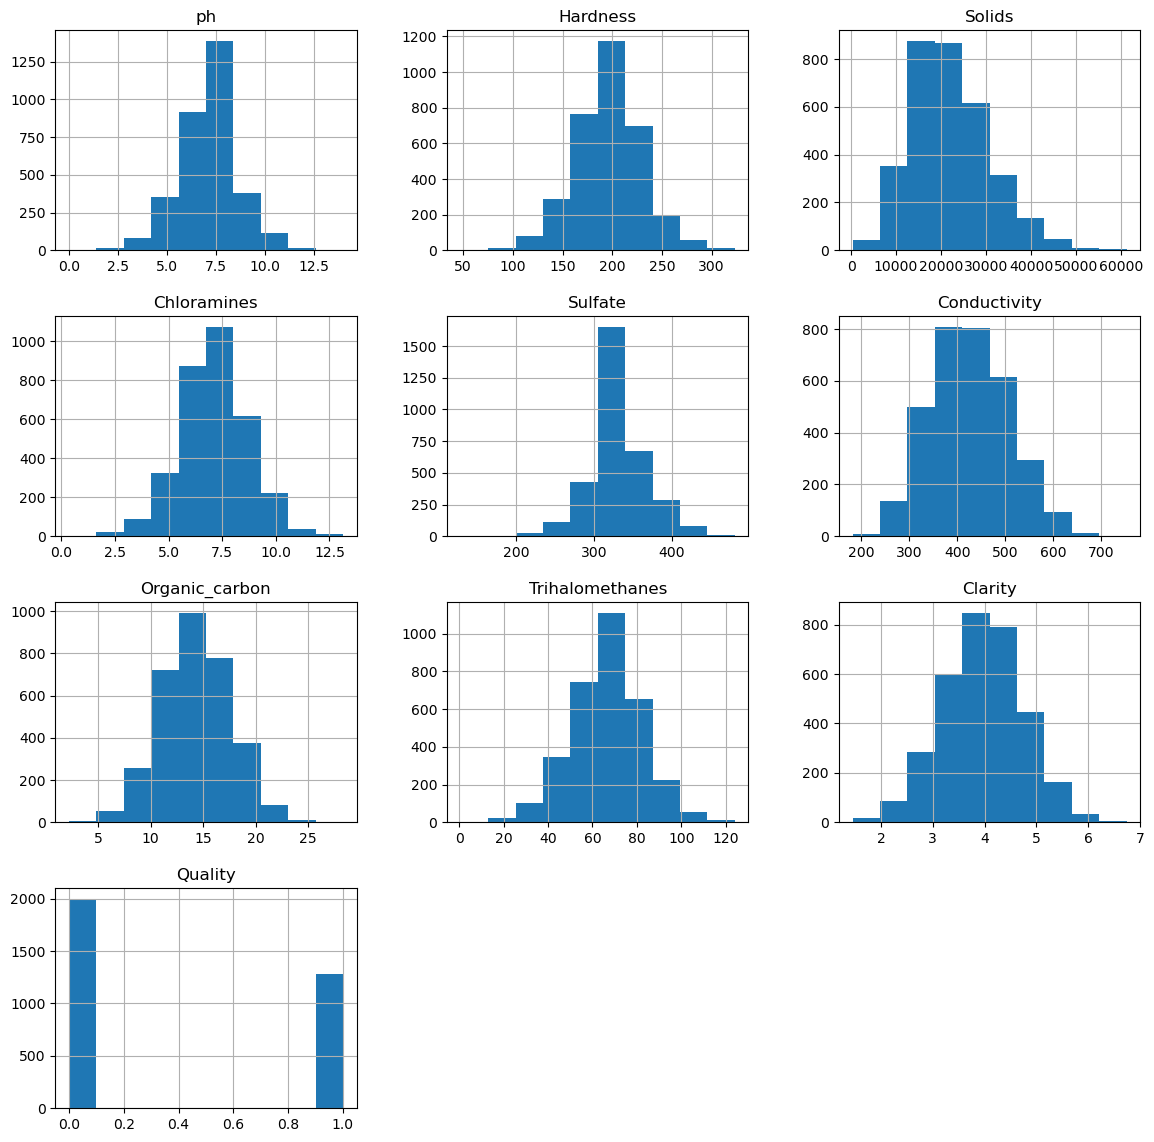

In [14]:
dataset_eda.hist(figsize=(14,14))
plt.show()

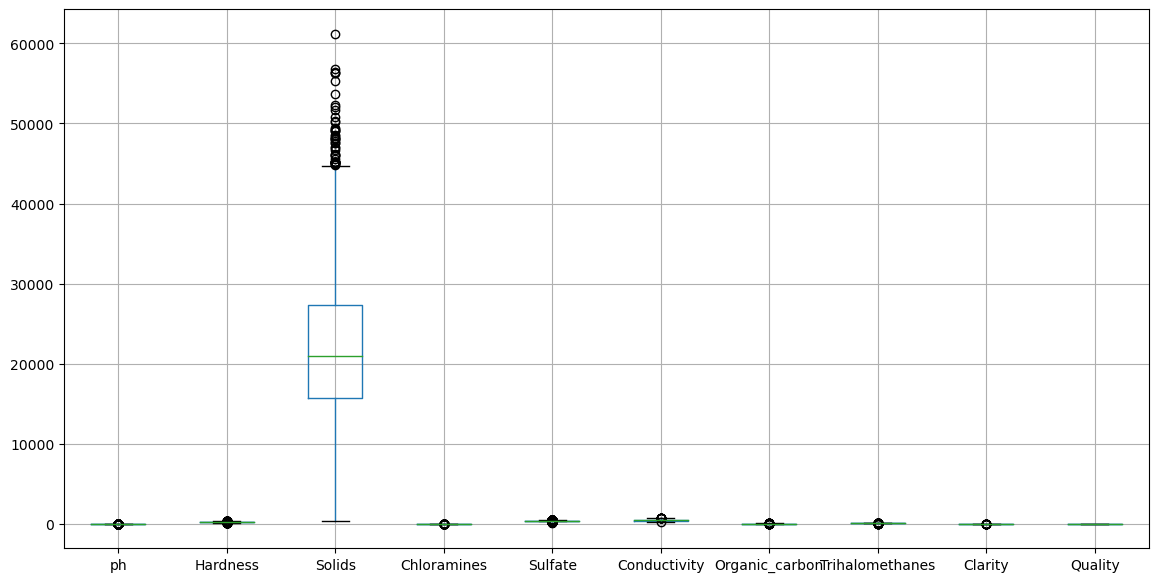

In [15]:
dataset_eda.boxplot(figsize=(14,7))
plt.show()

Although **solids** has a lot of *outliers*, we **DO NOT** want to remove them as they determine whether the water is up to standard

# Bivariate Analysis
the analysis of two variables to determine relationships between them.

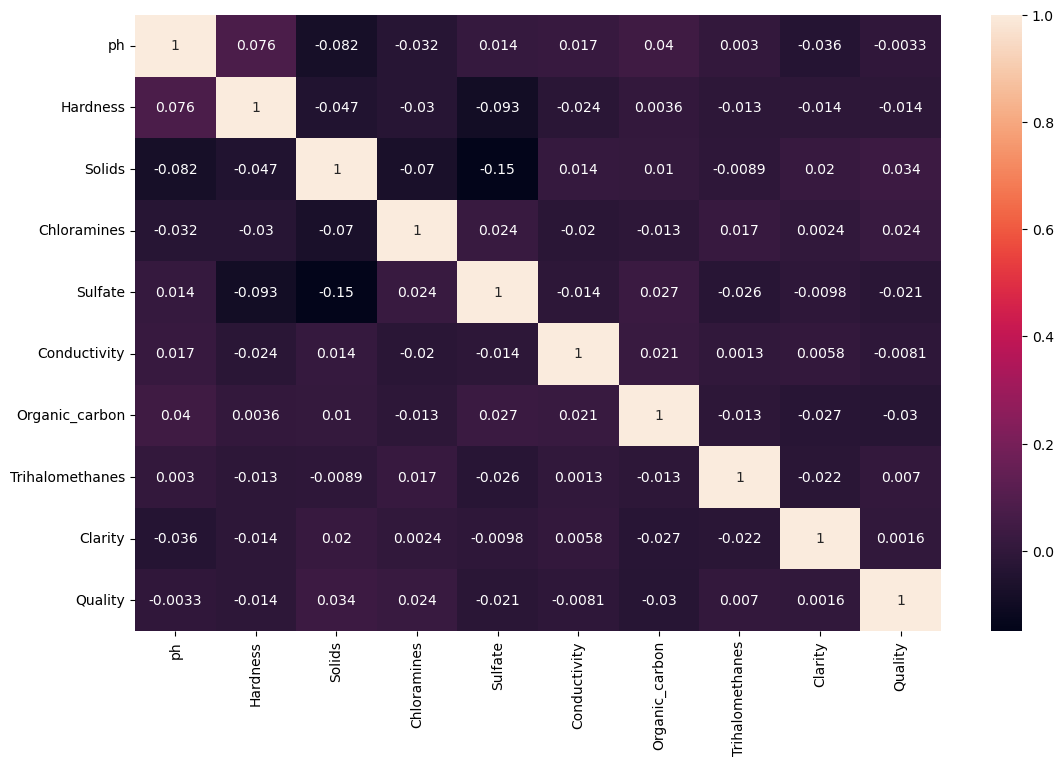

In [16]:
plt.figure(figsize=(13,8))
sns.heatmap(dataset_eda.corr(),annot=True)
plt.show()

Notice that the highest corridation is -0.15 that shows that theres almost no corrilation between the features. **This is important** as it tells us which **imputer** to use
- **SimpleImputer**: mean | median | mode
- IterativeImputer: creates Regression model to predict null values
- KNNImputer: take nearest features thats not NA and take the mean of it
<br><br>
Hence since the features dont affect each other, we dont use the Iterative or KNN imputer as they are used only if featues are related

c:\Users\pinpi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


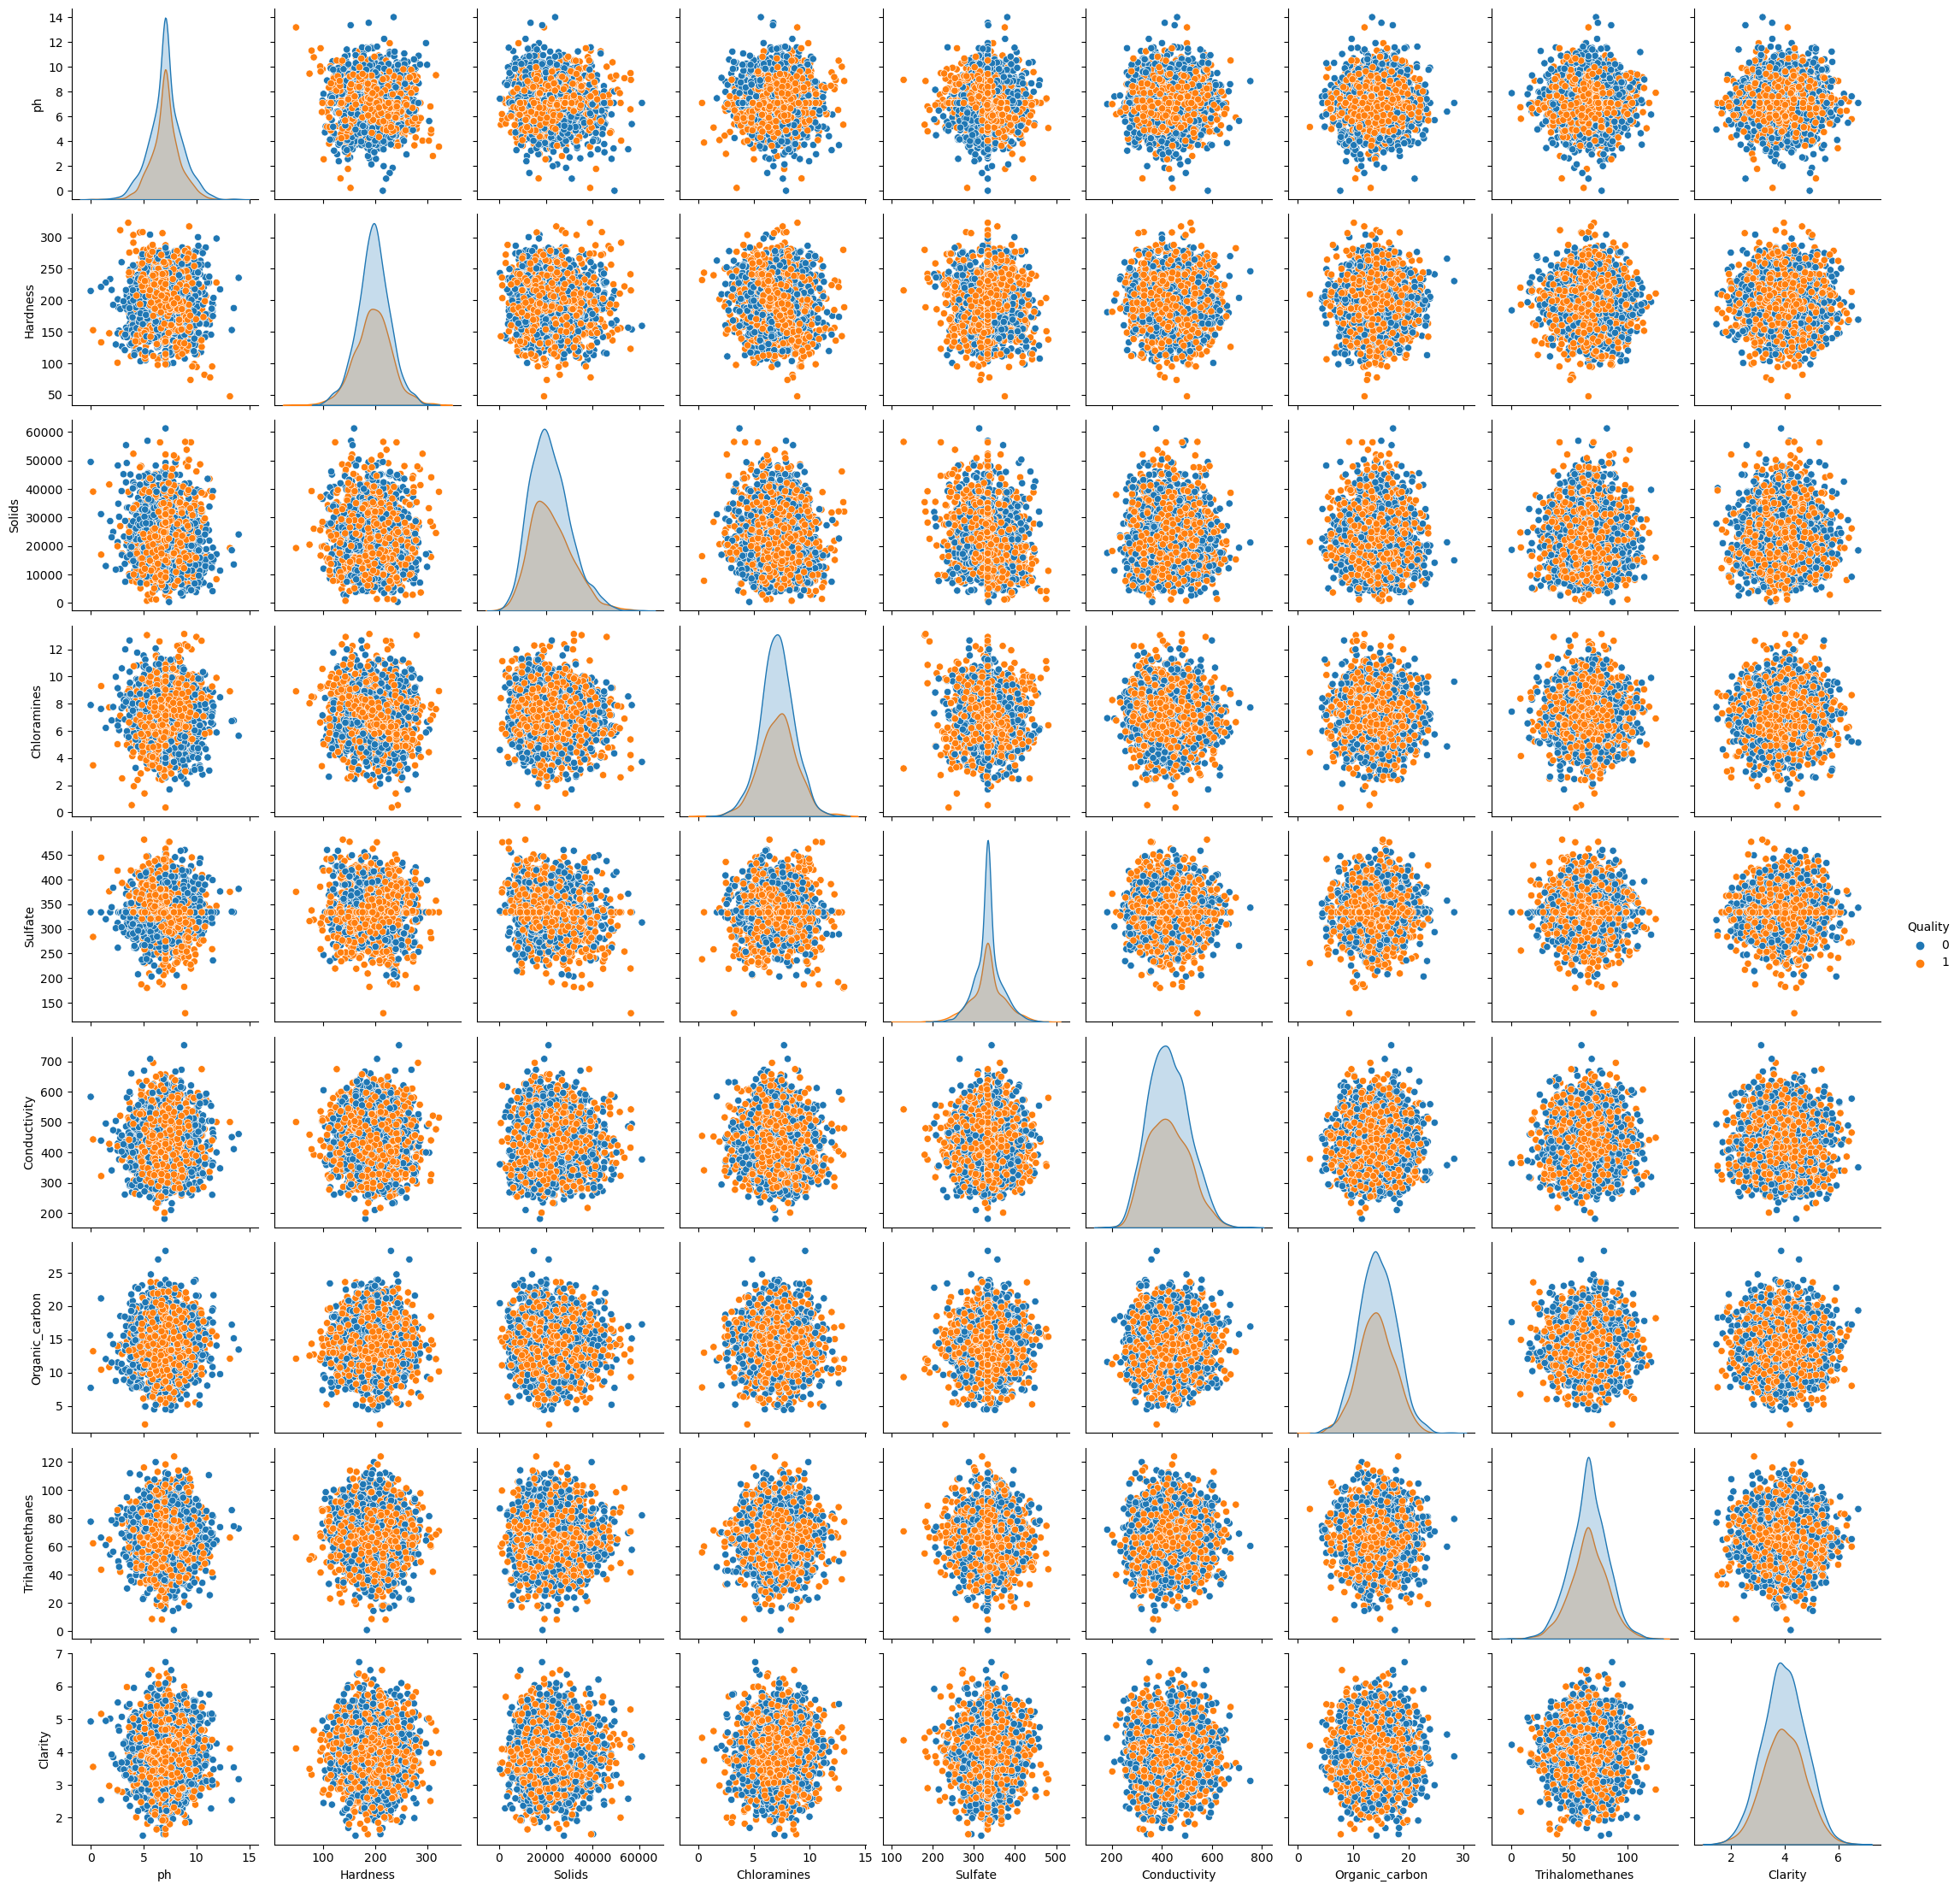

In [17]:
sns.pairplot(dataset_eda, hue="Quality")

#### Although they have little corrilation, We can feature engineer to get a K-constant corrilation between the features

## Relationship btween Solids (TDS) and Conductivity (EC)
Source: https://iopscience.iop.org/article/10.1088/1755-1315/118/1/012019/pdf<br>
TDS measurement is time-consuming, it is often estimated from electrical conductivity (EC). <br>
ke is a constant of proportionality that will increase along with the increase of ions in water. <br>
The number of ions present in water are very important for the human organism, but some are undesirable and toxic at higher concentration

Formula:
\begin{equation}
TDS(mg/L) = ke × EC(μS/cm)
\end{equation}

## Relationship btween Organic_carbon and Trihalomethanes
Source: https://dergipark.org.tr/tr/download/article-file/215448<br>
When the **k(pH − a)Cl2^{mtn}** expression is **HIGH**, it indicates that theres **HIGH** concentration of chlorinated water.<br>
Which has a toxic and carcinogenic effects in rats and mice, at much higher concentrations than the levels found in chlorinated water supplies<br>

Formula:
\begin{equation}
THM = k(pH − a)Cl2^{mtn} × TOC
\end{equation}

# Dataset Processing
we need to prepare and process our data so our model can be better fit with the data

In [18]:
# Seperating Target and Features
X = dataset.drop("Quality", axis=1)
y = dataset["Quality"]

In [19]:
# Splitting the data into Train(70%) & Test(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)       # Spliting Data (Test | Train)

In [20]:
print(X_test.shape)
print(X_train.shape)

(983, 9)
(2293, 9)


In [21]:
print("X_test NA values:")
print(X_test.isna().sum())
print("\nX_train NA values:")
print(X_train.isna().sum())

X_test NA values:
ph                 153
Hardness             0
Solids               0
Chloramines          0
Sulfate            232
Conductivity         0
Organic_carbon       0
Trihalomethanes     64
Clarity              0
dtype: int64

X_train NA values:
ph                 338
Hardness             0
Solids               0
Chloramines          0
Sulfate            549
Conductivity         0
Organic_carbon       0
Trihalomethanes     98
Clarity              0
dtype: int64


# Imputing
We use the SimpleImputer because there is little corrilation between the features.<br>
Hence, we save time by using less complex imputing models like Iterative and KNN imputers

In [22]:
# All Numerical Features that has missing values
num_cols = ["ph", "Sulfate", "Trihalomethanes"]

# initialize Imputer
imputer = SimpleImputer()

# Impute Train Data
X_train.loc[:, num_cols] = imputer.fit_transform(X_train[num_cols])
# Impute Test Data
X_test.loc[:, num_cols] = imputer.fit_transform(X_test[num_cols])

In [23]:
print("X_test NA values:")
print(X_test.isna().sum())
print("\nX_train NA values:")
print(X_train.isna().sum())

X_test NA values:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Clarity            0
dtype: int64

X_train NA values:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Clarity            0
dtype: int64


# Feature Engineering
We are going to create 2 new features called (K_ion | K_chlorine)

In [24]:
X_test["K_ion"] = X_test.loc[:,"Solids"]/X_test.loc[:,"Conductivity"]
X_test["K_chlorine"] = X_test.loc[:,"Trihalomethanes"]/X_test.loc[:,"Organic_carbon"]
X_test

ph    Hardness       Solids  Chloramines     Sulfate  \
1471  7.583770  217.283262  36343.40706     8.532726  375.964391   
861   7.123025  184.750698  28499.10733     6.550031  330.719549   
248   6.581878  272.982745  37169.44440     8.114731  416.083481   
1346  5.588537  171.333123  17732.24067     5.588614  343.041575   
2539  7.283914  197.602125  23112.50444     9.502809  332.331984   
...        ...         ...          ...          ...         ...   
162   6.208016  153.221106  17358.79637     8.214939  328.282029   
2867  7.125211  209.746771  16701.56598     7.458741  320.500945   
560   7.091886  221.191476  29091.20710     5.134960  333.616864   
3214  5.500277  263.683160  19911.22490     4.755312  366.942743   
171   7.123025  233.850345  21136.28676     6.689878  333.616864   

      Conductivity  Organic_carbon  Trihalomethanes   Clarity       K_ion  \
1471    393.877683       17.442301        77.722257  3.642289   92.270795   
861     381.501604       11.044405        62.014822  3.403270   74.702458   
248     351.476839       15.129334        79.261026  4.201663  105.752187   
1346    466.445429       13.827755        59.376451  4.373999   38.015681   
2539    449.361679       14.458591        70.000219  3.571863   51.434080   
...            ...             ...              ...       ...         ...   
162     481.195673       14.274092        62.718199  4.334616   36.074299   
2867    404.704596       18.952797        92.347375  3.908075   41.268535   
560     515.059986       19.578273        62.627330  5.116407   56.481202   
3214    435.865696       12.761184        51.439894  5.147536   45.682019   
171     332.737587        9.745282        77.529945  3.310859   63.522390   

      K_chlorine  
1471    4.455963  
861     5.615044  
248     5.238897  
1346    4.294005  
2539    4.841427  
...          ...  
162     4.393849  
2867    4.872493  
560     3.198818  
3214    4.030965  
171     7.955639  

[983 rows x 11 columns]

# Initializing Steps

In [25]:
def Const_Ion(df):
    df["K_ion"] = df["Solids"] - df["Conductivity"]
    return df

def Const_Chlorine(df):
    df["K_chlorine"] = df["Trihalomethanes"] - df["Organic_carbon"]
    return df

steps = [
    ("Const_Ion", FunctionTransformer(Const_Ion)),
    ("Const_Chlorine", FunctionTransformer(Const_Chlorine)),
    ("standardize", StandardScaler()),                # Scaling data
]

# Scaling Features
The data may be different units and may confuse the model
### Methods
- Standardization
    - the mean and divide by variance
    - features centered to 0 & variance = 1
- Normalization
    - data ranges from -1 to +1
<br><br><br>

Note that only **SOME** models are affected by scaling:
- KNN
- Linear Regression (plus Ridge, Lasso)
- Logistic Regression
- Artifcial Neural Network

In [26]:
# preset scoring options
scoring_methods = ["accuracy", "balanced_accuracy", "recall", "f1", "roc_auc"]

# Baseline DummyClassifier
### NOTE if you hit an error (Run the cell STEPS again)

In [27]:
steps.append(("model", DummyClassifier(strategy="uniform")))
dummy = Pipeline(steps)
dummy.fit(X_train, y_train)
print(f"Baseline Accuracy Score :{dummy.score(X_test, y_test)}")

scores = cross_validate(
    dummy,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True
)

# displaying scores
display(pd.DataFrame(scores).style.background_gradient(cmap="Blues"))

Baseline Accuracy Score :0.5066124109867752


In [28]:
X_test["K_ion"] = X_test.loc[:,"Solids"]/X_test.loc[:,"Conductivity"]
X_test["K_chlorine"] = X_test.loc[:,"Trihalomethanes"]/X_test.loc[:,"Organic_carbon"]

X_train["K_ion"] = X_train.loc[:,"Solids"]/X_train.loc[:,"Conductivity"]
X_train["K_chlorine"] = X_train.loc[:,"Trihalomethanes"]/X_train.loc[:,"Organic_carbon"]

In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(4,3))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    8.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   

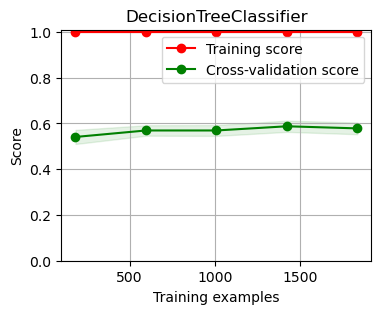

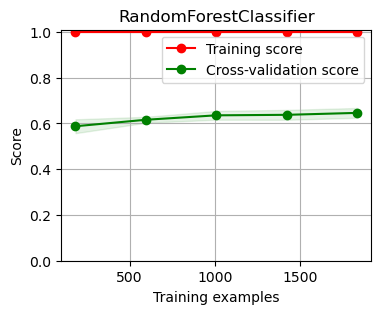

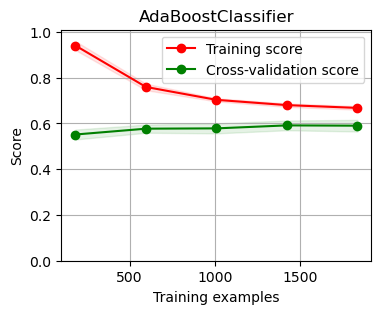

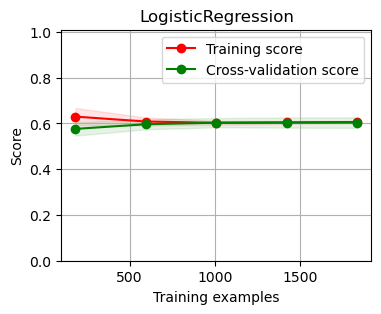

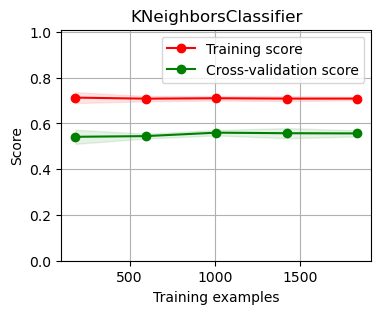

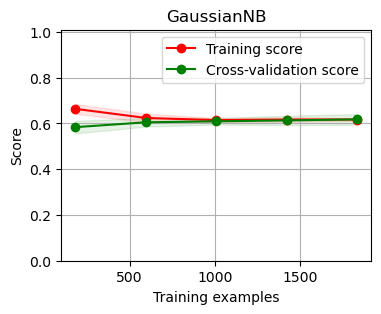

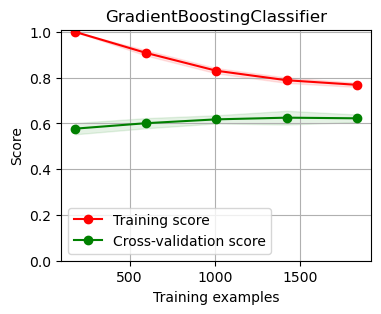

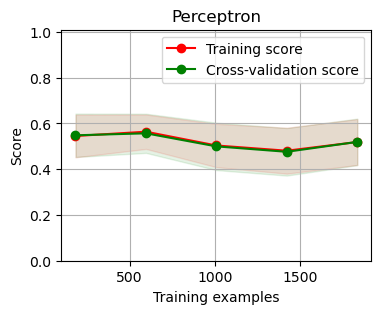

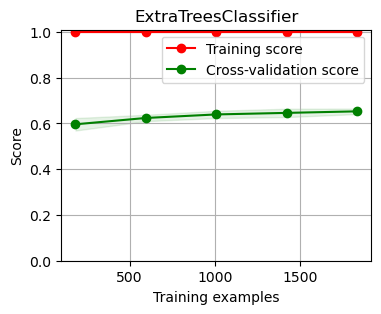

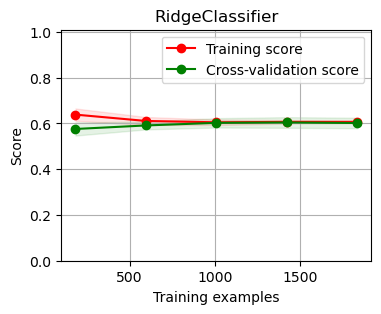

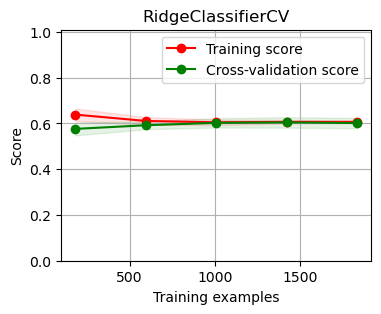

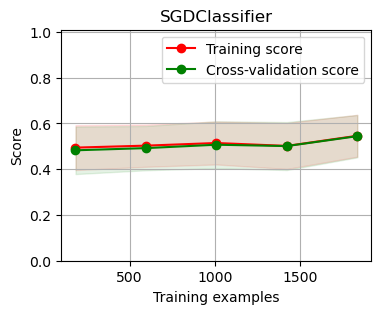

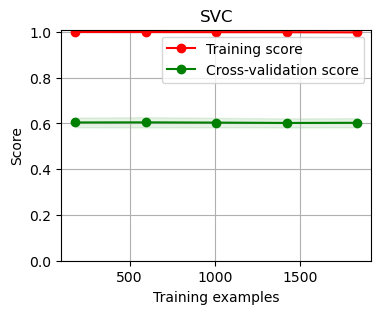

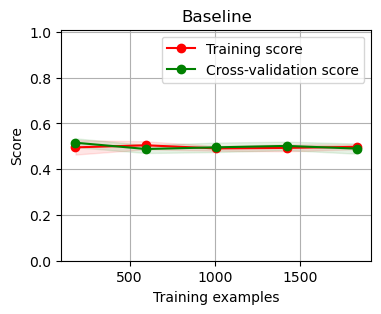

In [30]:
MODELS = [
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("LogisticRegression", LogisticRegression()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("GaussianNB", GaussianNB()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("Perceptron", Perceptron()),
    ("ExtraTreesClassifier", ExtraTreesClassifier()),
    ("RidgeClassifier", RidgeClassifier()),
    ("RidgeClassifierCV", RidgeClassifierCV()),
    ("SGDClassifier", SGDClassifier()),
    ("SVC",SVC(gamma=0.001)),
    ("Baseline",DummyClassifier(strategy="uniform"))
]

outputs = []
for model in MODELS:             # Testing out ALL the Models
    title = model[0]
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = model[1]
    plot_learning_curve(estimator, title, X_train, y_train, (0, 1.01), cv=cv, n_jobs=4)
    score = cross_validate(
            estimator,
            X_train,
            y_train,
            scoring=scoring_methods,
            n_jobs=3,
            verbose=1,
            cv=10,
            return_train_score=True,
        )
    outputs.append(pd.Series(score, name=model[0]).apply(np.mean))
plt.show()

## Types of learning curves
- Bad Learning Curve: High Bias
    - When training and testing errors converge and are high
    - No matter how much data we feed the model, the model cannot represent the underlying relationship and has high systematic errors
    - Poor fit
    Poor generalization
- Bad Learning Curve: High Variance
    - When there is a large gap between the errors
    - Require data to improve
    - Can simplify the model with fewer or less complex features
- Ideal Learning Curve
    - Model that generalizes to new data
    - Testing and training learning curves converge at similar values
    - Smaller the gap, the better our model generalizes

## Observations
we can see that some of the models are overfitted even after adding more data like (RandomForest).<br>
The models that we have to focus on is those that converges (Gradient Boosting)

In [31]:
display(pd.DataFrame(outputs).style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: ["background-color: green; color: white" if v else "" for v in x == x.max()]
))

The ones highlighted in green is the highest of the column and the ones in red are lowest<br>
From the table we can see that **(ExtraTreesClassifier)** has the highest amount of **green** and **(LogisticRegression)** has the most amount of **RED**<br>
However, though its good to look at the overview, we must focus on the **test** scores<br>

**Scoring Methods**
- **Precision** - Indicates the proportion of positive identifications (model
predicted class 1) which were actually correct. A model which produces
no false positives has a precision of 1.0.
- **Recall** - Indicates the proportion of actual positives which were correctly
classified. A model which produces no false negatives has a recall of 1.0.
- **F1 score** - A combination of precision and recall. A perfect model
achieves an F1 score of 1.0.
- **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy
is equal to 1.0.
- **Balanced Accuracy** - Mean of specificity and sensitivity 
- **ROC AUC** - Area Under the Receiver Operating Characteristic Curve  

### After looking at the over view, 
Models to work with (The Learning curve seems promising where more data gets better results)
- GradiantBoosting

##### lets compare them to the dummy baseline

Text(0.5, 1.0, 'Baseline')

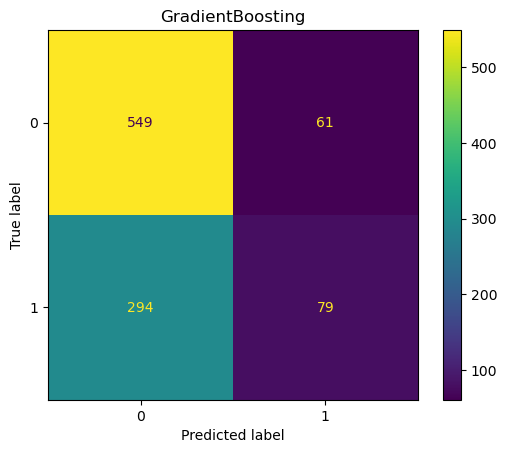

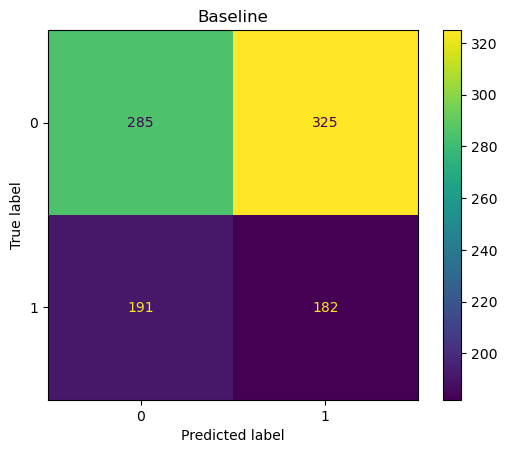

In [32]:
GradientBoost = GradientBoostingClassifier()
GradientBoost.fit(X_train,y_train)
y_pred = GradientBoost.predict(X_test)  
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("GradientBoosting")


Baseline = DummyClassifier(strategy="uniform")
Baseline.fit(X_train,y_train)
y_pred = Baseline.predict(X_test)  
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("Baseline")

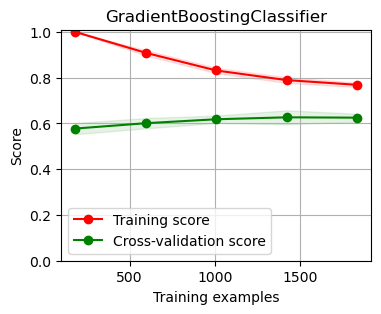

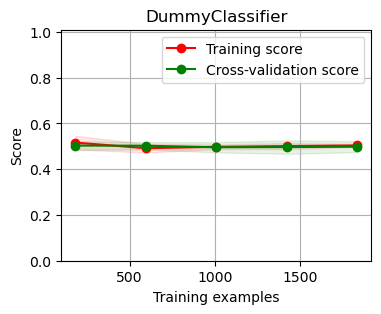

In [33]:
plot_learning_curve(GradientBoostingClassifier(), "GradientBoostingClassifier", X_train, y_train, (0, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(DummyClassifier(strategy="uniform"), "DummyClassifier", X_train, y_train, (0, 1.01), cv=cv, n_jobs=4)
plt.show()

In [34]:
GradientBoost.fit(X_train,y_train)
GradientBoost_y_pred = GradientBoost.predict(X_test)
print("GradientBoosting Report:")
print(classification_report(y_test, GradientBoost_y_pred))


Baseline.fit(X_train,y_train)
Baseline_y_pred = Baseline.predict(X_test)
print("Baseline Report:")
print(classification_report(y_test, Baseline_y_pred))

GradientBoosting Report:
              precision    recall  f1-score   support

           0       0.65      0.90      0.76       610
           1       0.57      0.21      0.31       373

    accuracy                           0.64       983
   macro avg       0.61      0.56      0.53       983
weighted avg       0.62      0.64      0.59       983

Baseline Report:
              precision    recall  f1-score   support

           0       0.63      0.51      0.56       610
           1       0.39      0.51      0.44       373

    accuracy                           0.51       983
   macro avg       0.51      0.51      0.50       983
weighted avg       0.54      0.51      0.52       983



# Model Improvement 
As you could tell our models still aren't stunningly amazing yet and theres still lots they can improve on

### Hyperparameter Tuning
Finding Parameters of GradientBoostingClassifier

In [35]:
list(GradientBoostingClassifier().get_params().keys())

['ccp_alpha',
 'criterion',
 'init',
 'learning_rate',
 'loss',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_iter_no_change',
 'random_state',
 'subsample',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

## RandomSearchCV
good for large dataset

In [37]:
print(format(' Results from RandomSearchCV ', '*^82'))
import warnings
warnings.filterwarnings("ignore")
# Load Libraries

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

model = GradientBoostingClassifier()
parameters = {'learning_rate': sp_randFloat(),
            'subsample': sp_randFloat(),
            'n_estimators' : sp_randInt(100, 1000),
            'max_depth': sp_randInt(4, 10)
}
                
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,cv = 2, n_iter = 10, n_jobs =- 1)
randm.fit(X_train, y_train)
print("\n The best estimator across ALL searched params: \n",randm.best_estimator_)
print("\n The best score across ALL searched params: \n", randm.best_score_)
print("\n The best parameters across ALL searched params: \n", randm.best_params_)

************************** Results from RandomSearchCV ***************************

 The best estimator across ALL searched params: 
 GradientBoostingClassifier(learning_rate=0.009292517760686958, max_depth=5,
                           n_estimators=365, subsample=0.8325727159182987)

 The best score across ALL searched params: 
 0.6441376776201975

 The best parameters across ALL searched params: 
 {'learning_rate': 0.009292517760686958, 'max_depth': 5, 'n_estimators': 365, 'subsample': 0.8325727159182987}


## GridSearchCV 
takes very long for large sets of data

In [38]:
print(format(' Results from GridSearchCV ','*^82'))
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

model = GradientBoostingClassifier()
parameters = {'learning_rate': [0.01,0.02,0.03],
            'subsample': [0.9, 0.5, 0.2],
            'n_estimators' : [100,500,1000],
            'max_depth': [4,6,8]
            }


grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs =- 1)
grid.fit(X_train, y_train)
print("\n The best estimator across ALL searched params: \n",grid.best_estimator_)
print("\n The best score across ALL searched params: \n", grid.best_score_)
print("\n The best parameters across ALL searched params: \n", grid.best_params_)

**************************** Results from GridSearchCV****************************

 The best estimator across ALL searched params: 
 GradientBoostingClassifier(learning_rate=0.01, max_depth=8, subsample=0.9)

 The best score across ALL searched params: 
 0.6441414814578132

 The best parameters across ALL searched params: 
 {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.9}


## GridSearch has a higher pecentage
although gridsearchcv will get the highest out of all the parameters, it is because it loops through all the parameters<br>
whereas randomsearchcv will just need to get lucky

# KFold
Splitting into k-subsets and Validate for k-times

In [36]:
# using cross_val_score & KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

steps = [("SimpleImputer", SimpleImputer()),
         ("scaler", StandardScaler()),         # scaling data
         ('RandomForestClassifier', RandomForestClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(pipeline, X, y, cv=kf)
print(scores.mean())

0.6797868180971885


# Feature Selection (Gini Importance | MDI)

reseting dataset<br>
water_quality - before new features<br>
water_quality_total - after new features<br>

In [38]:
water_quality = dataset.copy()
water_quality_total = dataset.copy()
num_cols = ["ph", "Sulfate", "Trihalomethanes"]
imputer = SimpleImputer()

imputer.fit(water_quality)
water_quality.loc[:, num_cols] = imputer.fit_transform(water_quality[num_cols])
water_quality_total.loc[:, num_cols] = imputer.fit_transform(water_quality_total[num_cols])
water_quality_total["K_ion"] = water_quality.loc[:,"Solids"]/water_quality.loc[:,"Conductivity"]
water_quality_total["K_chlorine"] = water_quality.loc[:,"Trihalomethanes"]/water_quality.loc[:,"Organic_carbon"]

Before adding new features

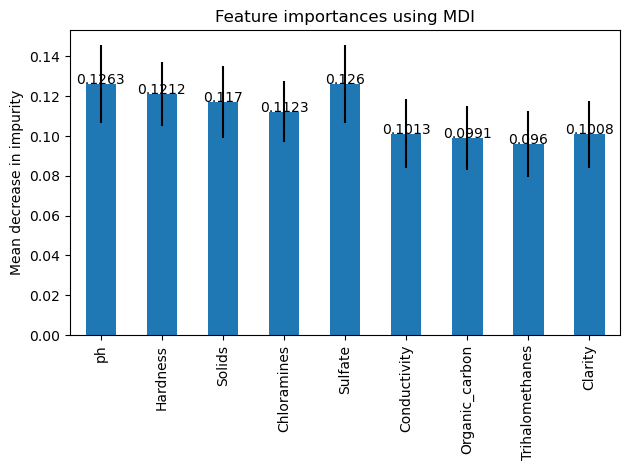

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = water_quality.drop("Quality", axis=1).values
y = water_quality["Quality"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
feature_names = list(water_quality.drop("Quality", axis=1).columns)
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i],4), ha = 'center')

import time

start_time = time.time()
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
addlabels(forest_importances,forest_importances)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

after adding new features

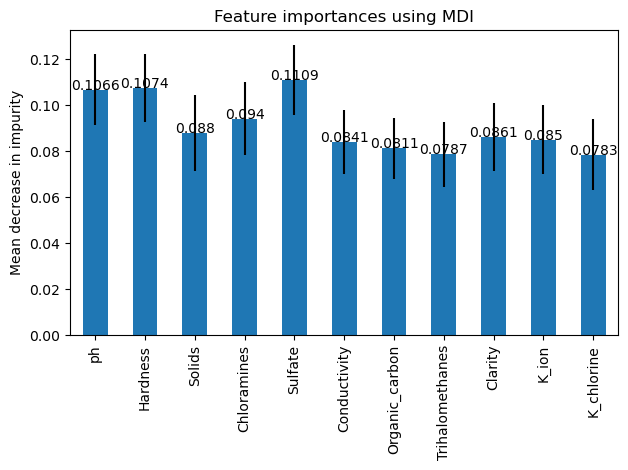

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = water_quality_total.drop("Quality", axis=1).values
y = water_quality_total["Quality"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
feature_names = list(water_quality_total.drop("Quality", axis=1).columns)
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i],4), ha = 'center')

import time

start_time = time.time()
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
addlabels(forest_importances,forest_importances)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Obeservation
### K_ion 
- We Observed that K_ion is higher than both organic_carbon and Trihalomethanes<br>
Hence making K_ion a useful new feature
### K_chlorine
- We Observed that K_chlorine is lower than both Conductivity and Solids.<br>
Hence making K_chlorine redundent as a new feature

Lets test to see if the features actually affect the models accuracy score

In [47]:
steps = [
    ('knn', DecisionTreeClassifier())]
pipeline = Pipeline(steps)

X = water_quality.drop("Quality", axis=1).values
y = water_quality["Quality"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
RF_scaled = pipeline.fit(X_train, y_train)
y_pred = RF_scaled.predict(X_test)
print(RF_scaled.score(X_test, y_test))

0.5807926829268293


In [48]:
steps = [
    ('knn', DecisionTreeClassifier())]
pipeline = Pipeline(steps)

X = water_quality_total.drop("Quality", axis=1).values
y = water_quality_total["Quality"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
RF_scaled = pipeline.fit(X_train, y_train)
y_pred = RF_scaled.predict(X_test)
print(RF_scaled.score(X_test, y_test))

0.6051829268292683


Even though the feature importance was around the same, it still gave the model a higher accuracy as there was more factors<br>
- Higher importance means the model will predict more accurately with that feature (Target Value will be affect more by that feature)

# Feature Selection (Permutation Importance | MDA)

before adding new features

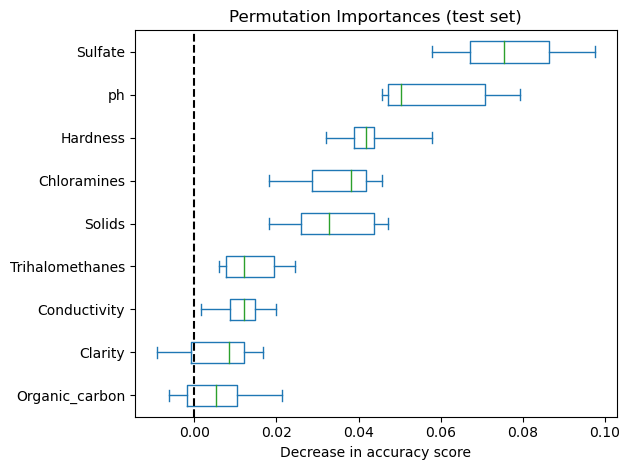

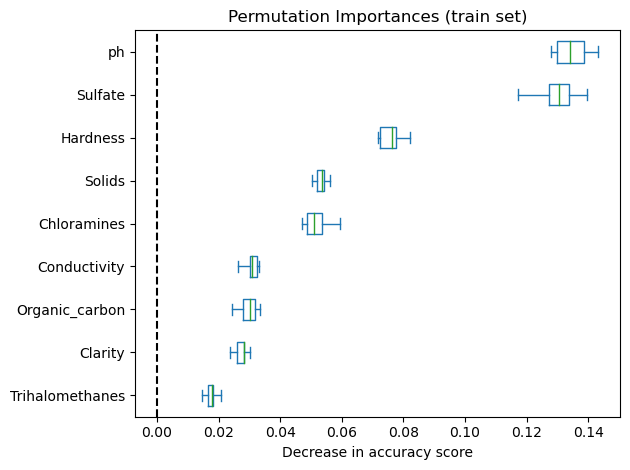

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = water_quality.drop("Quality", axis=1).values
y = water_quality["Quality"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
feature_names = list(water_quality.drop("Quality", axis=1).columns)
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
X = water_quality.drop("Quality", axis=1)



# Permuation Importance (Test Dataset)
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=random_state, n_jobs=2
)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# Permuation Importance (Train Dataset)
result = permutation_importance(
    forest, X_train, y_train, n_repeats=10, random_state=random_state, n_jobs=2
)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

after adding new features

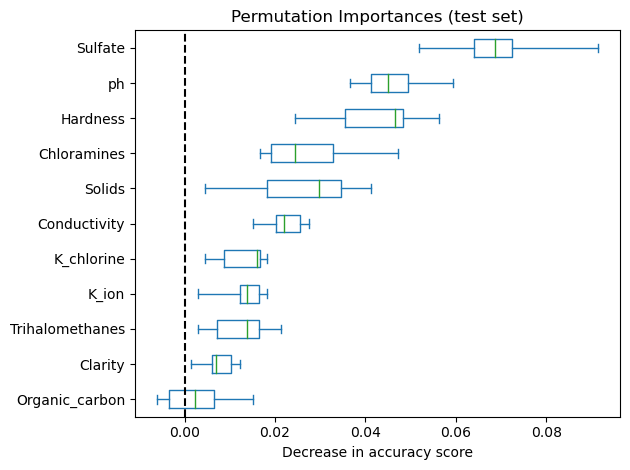

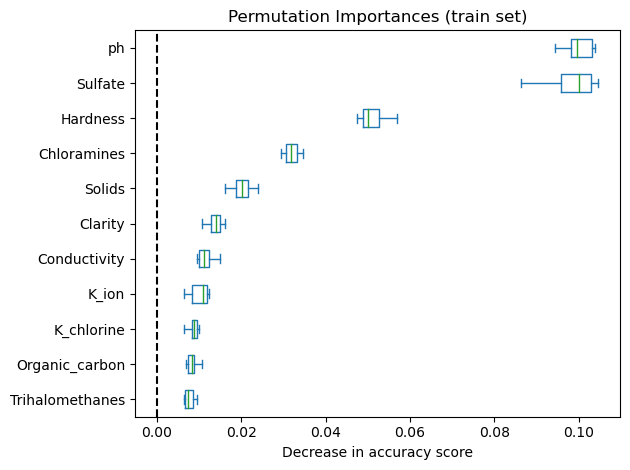

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = water_quality_total.drop("Quality", axis=1).values
y = water_quality_total["Quality"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
feature_names = list(water_quality_total.drop("Quality", axis=1).columns)
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
X = water_quality_total.drop("Quality", axis=1)



# Permuation Importance (Test Dataset)
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=random_state, n_jobs=2
)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# Permuation Importance (Train Dataset)
result = permutation_importance(
    forest, X_train, y_train, n_repeats=10, random_state=random_state, n_jobs=2
)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# Saving our Model
Two wasys to save and load machine learning models:
1. with `pickle` module
2. with `joblib` module

**Pickle**

In [70]:
import pickle

# Save model to file
pickle.dump(GradientBoost, open("Classification_GradientBoosting_model.pki","wb"))

In [71]:
# Getting saved model
loaded_pickle_model = pickle.load(open("./CA1-Models/Classification_GradientBoosting_model.pki","rb"))

In [76]:
y_pred = loaded_pickle_model.predict(X_test)
print("Pickled model:")
print(classification_report(y_test, y_pred))
print("current model:")
print(classification_report(y_test, GradientBoost_y_pred))

Pickled model:
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       617
           1       0.58      0.29      0.38       366

    accuracy                           0.66       983
   macro avg       0.63      0.58      0.57       983
weighted avg       0.64      0.66      0.62       983

current model:
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       617
           1       0.58      0.29      0.38       366

    accuracy                           0.66       983
   macro avg       0.63      0.58      0.57       983
weighted avg       0.64      0.66      0.62       983



**Joblib**

In [ ]:
from joblib import dump, load

# Save model to file
dump(GradientBoost, filename="Classification_GradientBoosting_model.joblib")

In [ ]:
# Getting saved model

loaded_joblib_model = load(filename="./CA1-Models/Classification_GradientBoosting_model.joblib")

In [ ]:
y_pred = loaded_joblib_model.predict(X_test)
print("Pickled model:")
print(classification_report(y_test, y_pred))
print("current model:")
print(classification_report(y_test, GradientBoost_y_pred))

# What I have Learn't
<hr>

**Models affected by scaling:**
- KNN
- Linear Regression (plus Ridge, Lasso)
- Logistic Regression
- Artifcial Neural Network

**classification report anatomy**
- **Support** - The number of samples each metric was calculated on.
- **Macro avg** - Short for macro average, the average precision, recall and
F1 score between classes. Macro avg doesn't class imbalance into
effort, so if you do have class imbalances, pay attention to this metric.
- **Weighted avg** - Short for weighted average, the weighted average
precision, recall and F1 score between classes. Weighted means each
metric is calculated with respect to how many samples there are in each
class. This metric will favour the majority class (e.g. will give a high value
when one class out performs another due to having more samples).

## **Questions**
<hr>

✔️**How is your prediction task defined? And what is the meaning of the output variable?** 
<hr>

  - Model should analize all the features and come to a prediction of the target value
  - Quality (1)
    - *Potable*, safe for consumption
  - Quality (0)
    - *Not Potable*, not safe for consumption
<br><br><br>
<hr>

✔️**Did you process the features in any way?** 
<hr>

  - **Scaling**
    - Standardization
      - the mean and divide by variance (features centered to 0 & variance = 1)
    - Normalization
      - All of data values scaled *DOWN* ranges from -1 to +1
  - **Impute**
    - replace with educated guesses
      - mean
      - median
      - mode
<br><br><br>
<hr>

✔️**How did you select which learning algorithms to use?** 
<hr>

  - **Scoring Methods**
    - Accuracy
      - what is the % of correctly predicted target
    - Balanced Accuracy
      - Mean of specificity and sensitivity 
    - Recall
      - True Positive Rate (Percentage that correctly identified TP and TN)
    - F1-score
      - Harmonic mean of precision and recall,
    - ROC AUC
      - Area Under the Receiver Operating Characteristic Curve  
<br><br><br>
<hr>

✔️**Did you try to tune the hyperparameters of the learning algorithm, and in that case how?** 
<hr>

  - **Hyperparameter Tuning**
    - Tuning the default parameters of the model to best fit the data given
  - **Yes**
    - *(GradiantBoostingClassifier)*
      - Using GridSearchCV - chooses all combinations of the parameters (Takes very long)
      - Using RandomSearchCV - Randomly selects parameters for set amount of time (default= 10)
<br><br><br>
<hr>

✔️**How do you evaluate the quality of your system?**   
<hr>

  - **Functions**
    - code reusablility 
  - **Loops**
    - less repetitive code
  - **Pipelines**
    - systematic sequence of tasks that show the flow of data
<br><br><br>
<hr>

✔️**How well does your system compare to a dummy baseline?**  
<hr>

  - DummyClassifier (Strategy - Most frequent)
    - makes predictions that ignore the input features.
    - dummy baseline gave a 50% accuracy which meant it was guessing (0 | 1)
<br><br><br>
<hr>

✔️**Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using)** 
<hr>
  
&nbsp;&nbsp;&nbsp;&nbsp; https://hal.science/hal-02436169v3/file/importance_variable.pdf
  - **Feature selection**
    - Mean Decrease in Impurity (MDI) - For Trees ONLY
      - sums up the gain associated to all splits performed along a given variable
    - Mean Decrease Accuracy (MDA)    - Any Predictive Model
      - shuffles entries of a specific variable in the test data set and computes the difference between the error on the permuted test set and the original test set.
<br><br><br>